<a href="https://colab.research.google.com/github/lisa-sophia/sexism-detection/blob/main/sexism_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From https://data.gesis.org/sharing/#!Detail/10.7802/2251 :

The file `sexism_data.csv` contains the data and binary sexism labels in csv format. Each row is an example. Each example has the following fields as columns in the file:
- `id`: (int >= 0) the serial id of the example
- `dataset`: (str, one of `benevolent, hostile, callme, scales, other`) the dataset of origin of the example (see the data statement and the paper for details on new and pre-existing datasets)
- `text`: (str) the text of the example (some preprocessing has been applied to remove PII and avoid data collection confounders, see the data statement and the paper)
- `toxicity`: (float) toxicity score of the text obtained from the Perspective API
- `sexist`: (boolean) binary label that tells if the text is sexist or not (see the paper for details on how to derive the binary labels from the fine-grained annotations in `sexist_annotations.csv`)
- `of_id`: (int) if the example is a modification this field is the `id` of the original example, `-1` otherwise (see the paper for details on how crowdworkers generated adversarial, non-sexist examples from original, sexist ones)

In [41]:
import pandas as pd

df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/TDDE16 Project/sexism_data.csv')
df.head()

,id,dataset,text,toxicity,sexist,of_id
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1


We onl

In [42]:
sexist_texts = df.text.loc[df['sexist'] == True]
for t in sexist_texts[:20]:   # print only the first 20 examples
  print(t)

All my sons have grown up with computer games but I'm not interested. I see them as a male thing. MENTION203
Women have more intuition than men.
Women do not belong in politics
On the average, men are more arrogant than women
A woman will never be truly fulfilled in life if she doesn’t have a committed long-term relationship with a man
mmmm Good luck MENTION3536 😄 let us know how you go? Still think u & MENTION395 should enter #MKR 😄 more cooking, less bitching mmmm
I hate having guys for teachers
A female can't tell me nothing bout sports. Sorry I grew up in a sports crazed house.
women can't drive. The only exception: danica patrick.
RT MENTION2547 I'm not sexist but the Men's skill sets and abilities are just leagues above the women's. Much more entertaining. #Olympics
RT MENTION2783 MENTION3161 I'm not sexist but i just don't believe in women being president
if a women don't know how to cook and take care of house she ain't a real women.
Women are more envious than men.
Soccer is 1

Plotting the data distribution shows that there are more non-sexist than sexist texts in the dataset.

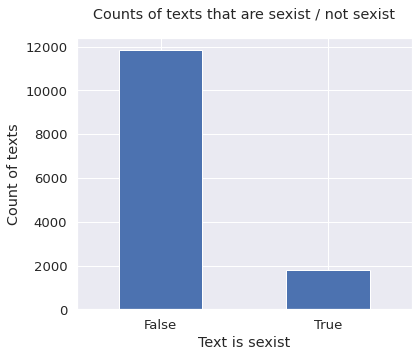

False    11822
True      1809
Name: sexist, dtype: int64


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
df['sexist'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Text is sexist")
plt.ylabel("Count of texts")
plt.title("Counts of texts that are sexist / not sexist", y=1.05)
plt.show()

print(df['sexist'].value_counts())
